# importing  library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# text preprocessing labraries

!pip install nltk
import nltk

from nltk.corpus import stopwords
sw=stopwords.words('english')
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()
from nltk.stem import WordNetLemmatizer
wl=WordNetLemmatizer()
import string 
string.punctuation

from nltk.sentiment import SentimentIntensityAnalyzer
sia=SentimentIntensityAnalyzer()
nltk.download('vader_lexicon')

from textblob import TextBlob

# pip install wordcloud==1.8.2.2
# ! pip show wordcloud
from wordcloud import WordCloud



[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\dell\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


# loading dataset

In [2]:
df=pd.read_csv('labeled_data.csv')

In [3]:
df.head()

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


In [4]:
df.shape

(24783, 7)

# data cleaning

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24783 entries, 0 to 24782
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          24783 non-null  int64 
 1   count               24783 non-null  int64 
 2   hate_speech         24783 non-null  int64 
 3   offensive_language  24783 non-null  int64 
 4   neither             24783 non-null  int64 
 5   class               24783 non-null  int64 
 6   tweet               24783 non-null  object
dtypes: int64(6), object(1)
memory usage: 1.3+ MB


In [6]:
# dropping the columns 
df.drop(['Unnamed: 0','count','hate_speech','offensive_language','neither'],axis=1,inplace=True)

In [7]:
# checking the null values
df.isnull().sum()

class    0
tweet    0
dtype: int64

In [8]:
# removing the duplicated values
df.drop_duplicates()

,class,tweet
0,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...
...,...,...
24778,1,you's a muthaf***in lie &#8220;@LifeAsKing: @2...
24779,2,"you've gone and broke the wrong heart baby, an..."
24780,1,young buck wanna eat!!.. dat nigguh like I ain...
24781,1,youu got wild bitches tellin you lies


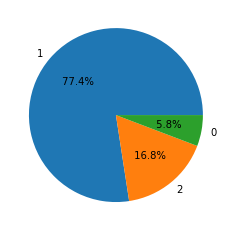

In [9]:
# constructing the piechart of output class
plt.pie(df['class'].value_counts().values,labels=df['class'].value_counts().index,
autopct=' %1.1f%%' )
plt.show()

In [10]:
df['class'].value_counts()

1    19190
2     4163
0     1430
Name: class, dtype: int64

In [11]:
df.describe()

,class
count,24783.000000
mean,1.110277
std,0.462089
min,0.000000
25%,1.000000
50%,1.000000
75%,1.000000
max,2.000000


C:\Users\dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


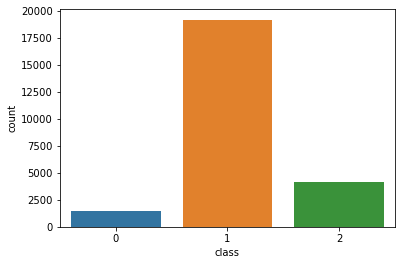

In [12]:
sns.countplot('class',data=df)
plt.show()

In [13]:
df['class'].replace({0:1},inplace=True)

C:\Users\dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


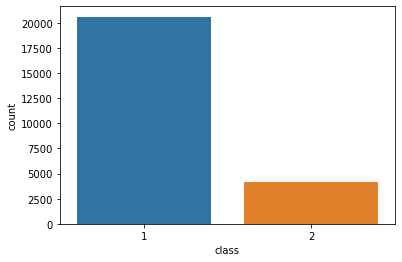

In [14]:
sns.countplot('class',data=df)
plt.show()

# data preprocessing

In [15]:
df['tweet']=df['tweet'].apply(lambda x: x.split(':')[-1].strip())
def tweet_preprocess(text):
#     lowering the text
    text=text.lower()
    
    text=nltk.word_tokenize(text)
    y=[]
    for i in text:
        if i.isalnum():
            y.append(i)
    text=y[:]
    y.clear()
#     removing the punctuation and stopword
    for i in text:
        if i not in sw and i not in string.punctuation:
            y.append(i)
    text=y[:]
    
    
#     for i in text:
#           y.append(ps.stem(i))

    
    return " ".join(y)

In [16]:
# applying the text preprocessing in df
df['transformed_tweet']=df['tweet'].apply(tweet_preprocess)

In [17]:
# extracting the different features 

df['len_word']=df['transformed_tweet'].apply(len)
df['num_word']=df['transformed_tweet'].apply(lambda x:len(nltk.word_tokenize(x)))

positive_score = [sia.polarity_scores(row.transformed_tweet).get('pos') for row in df.itertuples()]
negative_score=  [sia.polarity_scores(row.transformed_tweet).get('neg') for row in df.itertuples()]
df['positive_score']=positive_score
df['negative_score']=negative_score

blob_sentiment=[TextBlob(row.transformed_tweet).sentiment.polarity for row in df.itertuples()]
df['sentiment']=blob_sentiment


In [18]:
new_df=df.drop(['tweet'],axis=1)

In [19]:
new_df

,class,transformed_tweet,len_word,num_word,positive_score,negative_score,sentiment
0,2,woman complain cleaning house amp man always t...,55,9,0.000,0.238,0.000000
1,1,boy dats cold tyga dwn bad cuffin dat hoe 1st ...,51,11,0.000,0.259,-0.650000
2,1,ever fuck bitch start cry confused shit,39,7,0.000,0.891,-0.333333
3,1,look like tranny,16,3,0.556,0.000,0.000000
4,1,shit hear might true might faker bitch told ya...,52,10,0.163,0.430,0.075000
...,...,...,...,...,...,...,...
24778,1,right tl trash 8230 mine bible scriptures hymn...,52,9,0.000,0.000,0.285714
24779,2,gone broke wrong heart baby drove redneck crazy,47,8,0.000,0.624,-0.550000
24780,1,young buck wan na eat dat nigguh like aint fuc...,53,11,0.200,0.000,-0.050000
24781,1,youu got wild bitches tellin lies,33,6,0.000,0.626,0.100000


In [20]:
new_df.describe()

,class,len_word,num_word,positive_score,negative_score,sentiment
count,24783.000000,24783.000000,24783.000000,24783.000000,24783.000000,24783.000000
mean,1.167978,43.509099,7.269983,0.114838,0.284694,-0.005317
std,0.373854,29.027126,4.765634,0.167835,0.268272,0.302634
min,1.000000,0.000000,0.000000,0.000000,0.000000,-1.000000
25%,1.000000,23.000000,4.000000,0.000000,0.000000,-0.050000
50%,1.000000,40.000000,7.000000,0.000000,0.281000,0.000000
75%,1.000000,63.000000,10.000000,0.217000,0.487000,0.008333
max,2.000000,573.000000,83.000000,1.000000,1.000000,1.000000


In [21]:
# saving the data to csv
new_df.to_csv('new.csv')

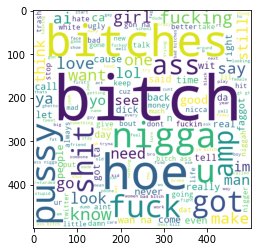

In [22]:
# constructing the word cloud for class hate&abusive
wc= WordCloud(width=500,height=500,min_font_size=10,background_color='white')
wc.generate(df[df['class']==1]['transformed_tweet'].str.cat(sep=""))
plt.imshow(wc)
plt.show()

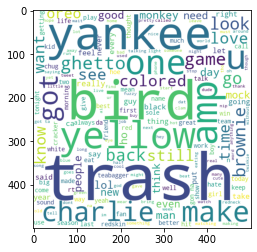

In [23]:
# constructing the word cloud for class positive tweet
wc= WordCloud(width=500,height=500,min_font_size=10,background_color='white')
wc.generate(df[df['class']==2]['transformed_tweet'].str.cat(sep=""))
plt.imshow(wc)
plt.show()

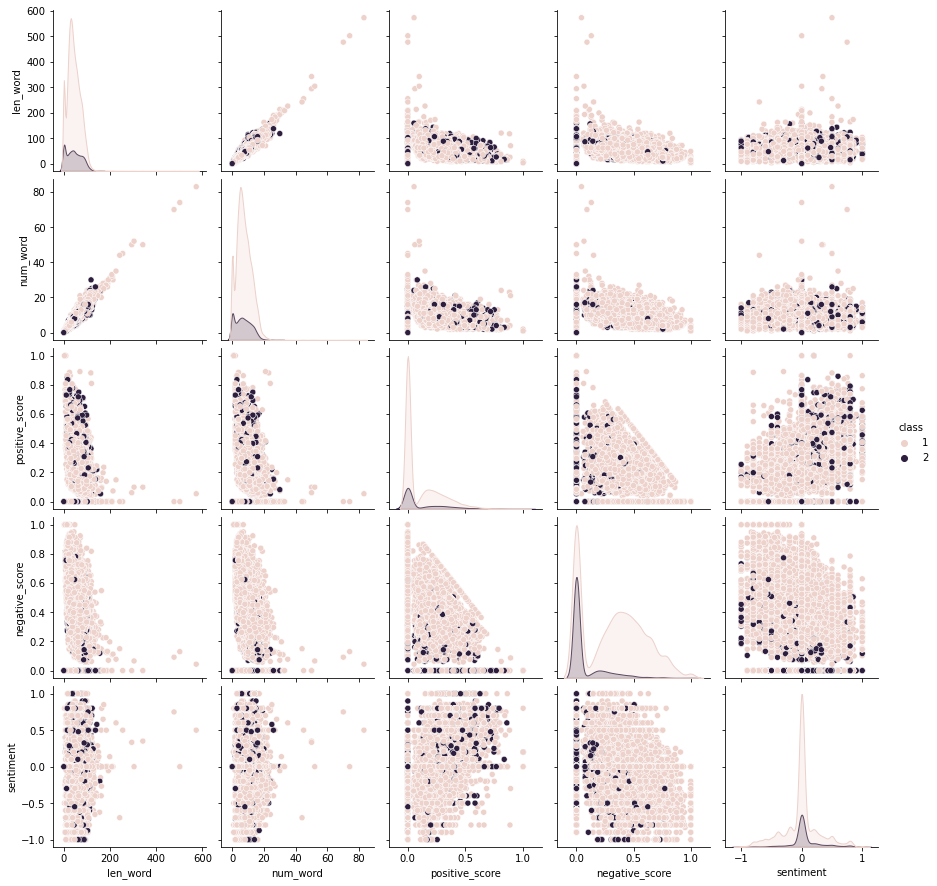

In [24]:
sns.pairplot(df,hue='class')


<AxesSubplot:>

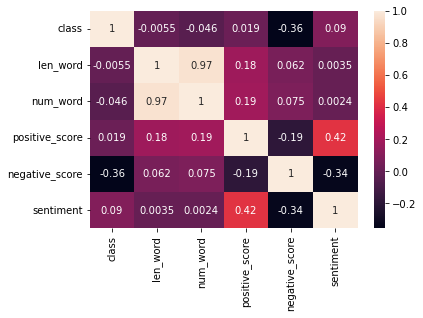

In [25]:
sns.heatmap(df.corr(),annot=True)

In [26]:

# sent_score = [sia.polarity_scores(row.transformed_tweet).get('compound') for row in new_df.itertuples()]
# df['sentiment'] =  sent_score

# for row in new_df.itertuples():
#     print(row.transformed_tweet)
#     print(sia.polarity_scores(row.transformed_tweet))



In [27]:
# new_df['transformed_tweet'].values.tolist()[100]

In [28]:
# blob = TextBlob(new_df['transformed_tweet'].values.tolist()[0])

In [29]:
# blob.sentiment.polarity

In [30]:

# for row in new_df.itertuples():
# #     print(row.transformed_tweet)
#     blob=(TextBlob(row.transformed_tweet))
#     print(blob.sentiment.polarity)
    
    
    

In [31]:
# [sia.polarity_scores(row.transformed_tweet).get('neg') for row in df.itertuples()]
